In [3]:
#https://www.youtube.com/watch?v=OVQ7zporutk
#https://github.com/balajisrinivas/ChatBot-using-Keras-TkinterGUI


import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('C:/Muthu_Raman_SIvakumar/Machine Learning/Video Recognition using facial expression/ChatBot/ChatBot_/ChatBot-using-Keras-TkinterGUI-main/intents_cus.json').read()
intents = json.loads(data_file)

In [4]:
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi there',
    'How are you',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day',
    'Good Morning',
    'Hi'],
   'responses': ['Hello, thanks for asking',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context': ['']},
  {'tag': 'goodbye',
   'patterns': ['Bye',
    'See you later',
    'Goodbye',
    'Nice chatting to you, bye',
    'Till next time',
    'Thanks',
    'Have a nice day',
    'Good one'],
   'responses': ['See you!',
    'Have a nice day',
    'Bye! Come back again for any help.'],
   'context': ['']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Awesome, thanks',
    'Thanks for helping me'],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure'],
   'context': ['']},
  {'tag': 'noanswer',
   'patterns': [],
   'responses': ["Sorry, can't understand you",
    'Please give me more info',
    'Not sure I understand'],
   'c

In [5]:
data_file

'{\n   "intents":[\n      {\n         "tag":"greeting",\n         "patterns":[\n            "Hi there",\n            "How are you",\n            "Is anyone there?",\n            "Hey",\n            "Hola",\n            "Hello",\n            "Good day",\n\t    "Good Morning",\n\t    "Hi"\n\n         ],\n         "responses":[\n            "Hello, thanks for asking",\n            "Good to see you again",\n            "Hi there, how can I help?"\n         ],\n         "context":[\n            ""\n         ]\n      },\n      {\n         "tag":"goodbye",\n         "patterns":[\n            "Bye",\n            "See you later",\n            "Goodbye",\n            "Nice chatting to you, bye",\n            "Till next time",\n\t    "Thanks",\n            "Have a nice day",\n            "Good one"\n         ],\n         "responses":[\n            "See you!",\n            "Have a nice day",\n            "Bye! Come back again for any help."\n         ],\n         "context":[\n            ""\n     

In [6]:
# Read through the inten notepad file in the above location and store each word seperately in documents and tags (i.e. target) in classes

for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list and to avoid repitition use if case
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [7]:
words

['Hi',
 'there',
 'How',
 'are',
 'you',
 'Is',
 'anyone',
 'there',
 '?',
 'Hey',
 'Hola',
 'Hello',
 'Good',
 'day',
 'Good',
 'Morning',
 'Hi',
 'Bye',
 'See',
 'you',
 'later',
 'Goodbye',
 'Nice',
 'chatting',
 'to',
 'you',
 ',',
 'bye',
 'Till',
 'next',
 'time',
 'Thanks',
 'Have',
 'a',
 'nice',
 'day',
 'Good',
 'one',
 'Thanks',
 'Thank',
 'you',
 'That',
 "'s",
 'helpful',
 'Awesome',
 ',',
 'thanks',
 'Thanks',
 'for',
 'helping',
 'me',
 'How',
 'you',
 'could',
 'help',
 'me',
 '?',
 'What',
 'you',
 'can',
 'do',
 '?',
 'What',
 'help',
 'you',
 'provide',
 '?',
 'How',
 'you',
 'can',
 'be',
 'helpful',
 '?',
 'What',
 'support',
 'is',
 'offered',
 'Issue',
 'Problem',
 'any',
 'documentation',
 'Which',
 'is',
 'the',
 'best',
 'programming',
 'language',
 '?',
 'Can',
 'you',
 'tell',
 'me',
 'the',
 'best',
 'language',
 'ever',
 '?',
 'What',
 'language',
 'can',
 'I',
 'start',
 'for',
 'programming',
 'Is',
 'Python',
 'language',
 'an',
 'awesome',
 'language',

In [8]:
documents

[(['Hi', 'there'], 'greeting'),
 (['How', 'are', 'you'], 'greeting'),
 (['Is', 'anyone', 'there', '?'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Hola'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Good', 'day'], 'greeting'),
 (['Good', 'Morning'], 'greeting'),
 (['Hi'], 'greeting'),
 (['Bye'], 'goodbye'),
 (['See', 'you', 'later'], 'goodbye'),
 (['Goodbye'], 'goodbye'),
 (['Nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'),
 (['Till', 'next', 'time'], 'goodbye'),
 (['Thanks'], 'goodbye'),
 (['Have', 'a', 'nice', 'day'], 'goodbye'),
 (['Good', 'one'], 'goodbye'),
 (['Thanks'], 'thanks'),
 (['Thank', 'you'], 'thanks'),
 (['That', "'s", 'helpful'], 'thanks'),
 (['Awesome', ',', 'thanks'], 'thanks'),
 (['Thanks', 'for', 'helping', 'me'], 'thanks'),
 (['How', 'you', 'could', 'help', 'me', '?'], 'options'),
 (['What', 'you', 'can', 'do', '?'], 'options'),
 (['What', 'help', 'you', 'provide', '?'], 'options'),
 (['How', 'you', 'can', 'be', 'helpful', '?'], 'options'),
 (['What', 'support

In [9]:
classes

['greeting', 'goodbye', 'thanks', 'options', 'python_is_best', 'joke']

In [10]:
# lemmaztize and lower each word and remove duplicates

# Lemmaztize is used to remove words having same root word (for eg: run, running, runner), In this run is the root word.
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

40 documents
6 classes ['goodbye', 'greeting', 'joke', 'options', 'python_is_best', 'thanks']
72 unique lemmatized words ["'s", ',', 'a', 'am', 'an', 'and', 'any', 'anyone', 'are', 'awesome', 'be', 'beginner', 'best', 'bye', 'can', 'chatting', 'could', 'day', 'do', 'documentation', 'ever', 'for', 'fun', 'funny', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'hola', 'how', 'i', 'is', 'issue', 'joke', 'language', 'later', 'laugh', 'learn', 'make', 'me', 'morning', 'need', 'new', 'next', 'nice', 'offered', 'one', 'problem', 'programming', 'provide', 'python', 'see', 'some', 'start', 'support', 'tell', 'thank', 'thanks', 'that', 'the', 'there', 'till', 'time', 'to', 'what', 'which', 'you']


In [11]:
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

In [12]:
words

["'s",
 ',',
 'a',
 'am',
 'an',
 'and',
 'any',
 'anyone',
 'are',
 'awesome',
 'be',
 'beginner',
 'best',
 'bye',
 'can',
 'chatting',
 'could',
 'day',
 'do',
 'documentation',
 'ever',
 'for',
 'fun',
 'funny',
 'good',
 'goodbye',
 'have',
 'hello',
 'help',
 'helpful',
 'helping',
 'hey',
 'hi',
 'hola',
 'how',
 'i',
 'is',
 'issue',
 'joke',
 'language',
 'later',
 'laugh',
 'learn',
 'make',
 'me',
 'morning',
 'need',
 'new',
 'next',
 'nice',
 'offered',
 'one',
 'problem',
 'programming',
 'provide',
 'python',
 'see',
 'some',
 'start',
 'support',
 'tell',
 'thank',
 'thanks',
 'that',
 'the',
 'there',
 'till',
 'time',
 'to',
 'what',
 'which',
 'you']

In [13]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    
    # We are trying to include only those uniqe words from words based on lemmaztize
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])

In [14]:
output_empty

[0, 0, 0, 0, 0, 0]

In [15]:
pattern_words

['tell', 'me', 'a', 'joke']

In [16]:
documents

[(['Hi', 'there'], 'greeting'),
 (['How', 'are', 'you'], 'greeting'),
 (['Is', 'anyone', 'there', '?'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Hola'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Good', 'day'], 'greeting'),
 (['Good', 'Morning'], 'greeting'),
 (['Hi'], 'greeting'),
 (['Bye'], 'goodbye'),
 (['See', 'you', 'later'], 'goodbye'),
 (['Goodbye'], 'goodbye'),
 (['Nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'),
 (['Till', 'next', 'time'], 'goodbye'),
 (['Thanks'], 'goodbye'),
 (['Have', 'a', 'nice', 'day'], 'goodbye'),
 (['Good', 'one'], 'goodbye'),
 (['Thanks'], 'thanks'),
 (['Thank', 'you'], 'thanks'),
 (['That', "'s", 'helpful'], 'thanks'),
 (['Awesome', ',', 'thanks'], 'thanks'),
 (['Thanks', 'for', 'helping', 'me'], 'thanks'),
 (['How', 'you', 'could', 'help', 'me', '?'], 'options'),
 (['What', 'you', 'can', 'do', '?'], 'options'),
 (['What', 'help', 'you', 'provide', '?'], 'options'),
 (['How', 'you', 'can', 'be', 'helpful', '?'], 'options'),
 (['What', 'support

In [17]:
training

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0],
  [0, 1, 0, 0, 0, 0]],
 [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1],
  [0, 1, 0, 0, 0, 0]],
 [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0

In [18]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


C:\Users\MuthuRamanSivakumar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
train_x

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [20]:
train_y

[[0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0]]

In [21]:
len(train_y[0])

6

# Bag of word with create a matrix with rows and columns of same and assign binary 1's or 0's based on presence

# IN simple words, Creating all those trainign sentences into matrices based on number of repeating words in that sentence

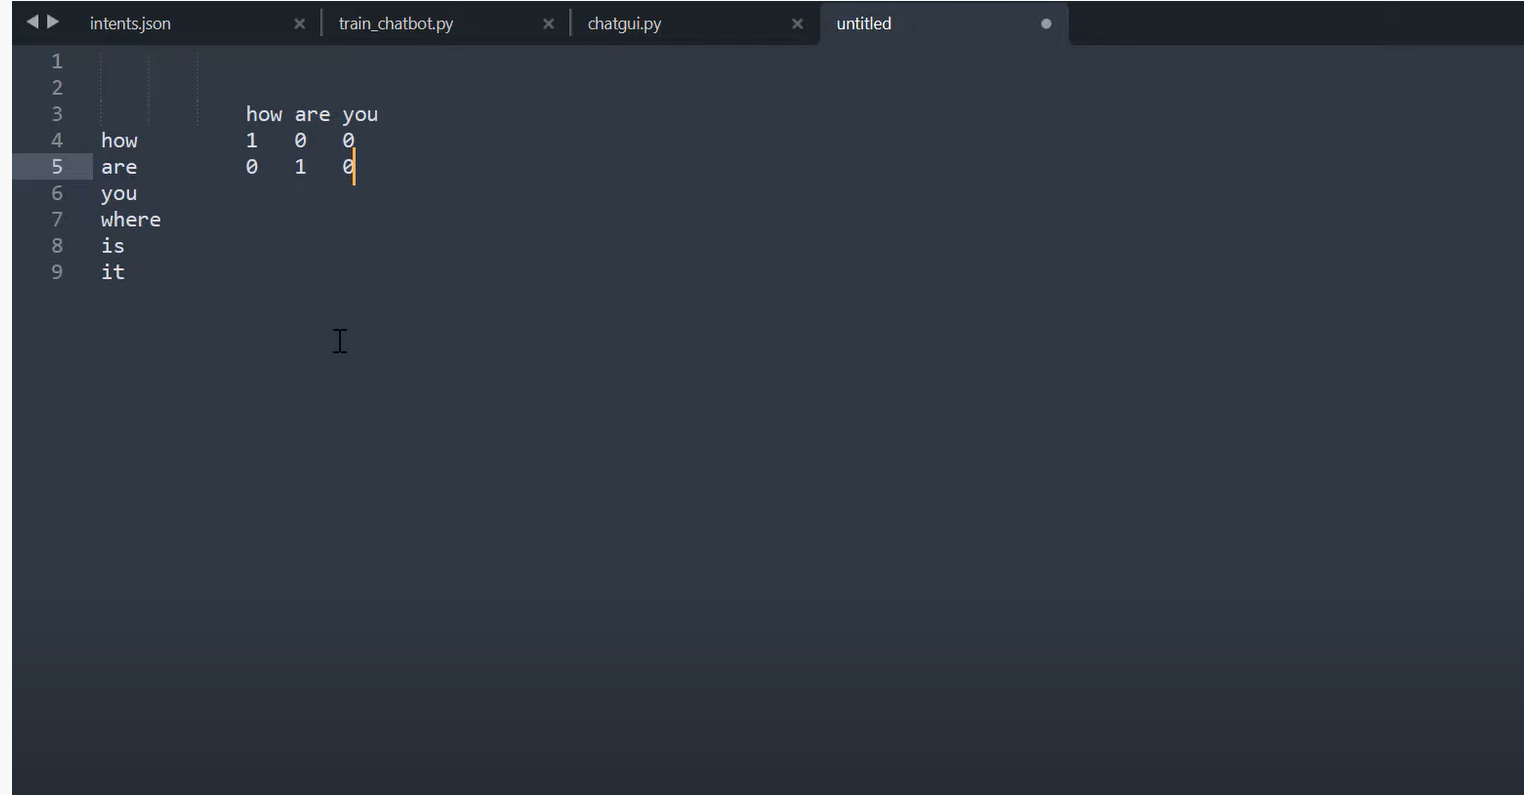


In [22]:
len(train_y[0])

6

In [23]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()

# 128 neurons are used here
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))

# drop out is used to avoid overfitting and having 50% of neurons deactivated
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

# drop out is used to avoid overfitting and having 50% of neurons deactivated
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [24]:
train_x

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [25]:
train_y

[[0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0]]

In [26]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created and saved")

Epoch 1/200
8/8 [==============================] - 0s 1ms/step - loss: 1.8602 - accuracy: 0.1221
Epoch 2/200
8/8 [==============================] - 0s 1ms/step - loss: 1.7786 - accuracy: 0.2080
Epoch 3/200
8/8 [==============================] - 0s 1ms/step - loss: 1.7761 - accuracy: 0.2713
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 1.6395 - accuracy: 0.2137
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 1.5319 - accuracy: 0.6149
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 1.5171 - accuracy: 0.4903
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 1.4661 - accuracy: 0.4538
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 1.3929 - accuracy: 0.5490
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 1.1601 - accuracy: 0.5841
Epoch 10/200
8/8 [==============================] - 0s 1ms/step - loss: 1.2452 - accuracy: 0.5377
Epoch 11/200
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9876
Epoch 85/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9876
Epoch 86/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9831
Epoch 87/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.8367
Epoch 88/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9313
Epoch 89/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9913
Epoch 90/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9702
Epoch 91/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9831
Epoch 92/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9788
Epoch 93/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 1.0000
Epoch 94/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9788
Epoch 167/200
8/8 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.9368
Epoch 168/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9590
Epoch 169/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9368
Epoch 170/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9646
Epoch 171/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9831
Epoch 172/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9944
Epoch 173/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9876
Epoch 174/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9944
Epoch 175/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9876
Epoch 176/200
8/8 [=====

In [27]:
# Real Time Prediction

In [37]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np

from tensorflow.keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('C:/Muthu_Raman_SIvakumar/Machine Learning/Video Recognition using facial expression/ChatBot/ChatBot_/ChatBot-using-Keras-TkinterGUI-main/intents_cus.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [38]:
# Same preprocessing to be carried out as training phase model

def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

In [39]:
clean_up_sentence('How are you?')

['how', 'are', 'you', '?']

In [40]:
words

["'s",
 ',',
 'a',
 'am',
 'an',
 'and',
 'any',
 'anyone',
 'are',
 'awesome',
 'be',
 'beginner',
 'best',
 'bye',
 'can',
 'chatting',
 'could',
 'day',
 'do',
 'documentation',
 'ever',
 'for',
 'fun',
 'funny',
 'good',
 'goodbye',
 'have',
 'hello',
 'help',
 'helpful',
 'helping',
 'hey',
 'hi',
 'hola',
 'how',
 'i',
 'is',
 'issue',
 'joke',
 'language',
 'later',
 'laugh',
 'learn',
 'make',
 'me',
 'morning',
 'need',
 'new',
 'next',
 'nice',
 'offered',
 'one',
 'problem',
 'programming',
 'provide',
 'python',
 'see',
 'some',
 'start',
 'support',
 'tell',
 'thank',
 'thanks',
 'that',
 'the',
 'there',
 'till',
 'time',
 'to',
 'what',
 'which',
 'you']

In [41]:
# 
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [42]:
# Predicting the results

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [43]:
# Pick a random resposne from the one of the listed tags sentences


def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

In [44]:
# The picked response is sent here

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res


In [45]:
# We are using tkinter for GUI so whatever message is given goes back to chatbot_response and returns the message

#Creating GUI with tkinter
import tkinter
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
    
        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')
            
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)
 

base = Tk()
base.title("Chatbot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#25cdf7", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)

base.mainloop()